In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline # 2 modeli arka arkaya çalıştırmak için

In [3]:
df=pd.read_csv('3-customersatisfaction.csv')

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


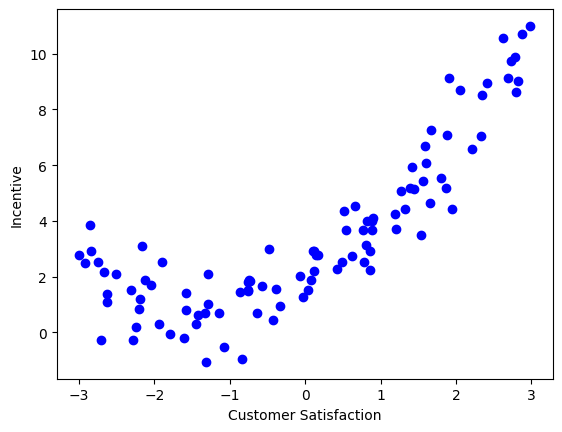

In [7]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()# polinomsal bir grafik çıktı

In [9]:
# dependent independent features
X=df[["Customer Satisfaction"]]# X=df[:,:-1]
y=df["Incentive"]            # y=df[:,-1]

In [10]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [11]:
#tarin-test split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)

In [12]:
X_train.head()

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460


In [13]:
#sacler
scaler =StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
regression=LinearRegression()

In [17]:
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred=regression.predict(X_test)

In [19]:
score=r2_score(y_test,y_pred)
print(score)# % 27 gibi kötü bir sonuç verdi

0.2705652535622246


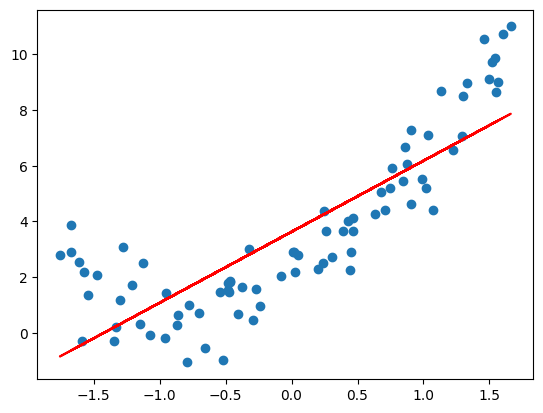

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="red")   # kendi best fit line ne kadar hatalı olduğunu görüyoruz
plt.show()

PolynomialFeatures ==> kütüphanesi ->[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [21]:
poly=PolynomialFeatures(degree=2)

In [22]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [23]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [25]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)# X_train_poly alındı

LinearRegression()

In [26]:
y_pred=regression.predict(X_test_poly)#X_test_poly alındı
score=r2_score(y_test,y_pred)
print(score) # r2 score yükseldi


0.7685687698788557


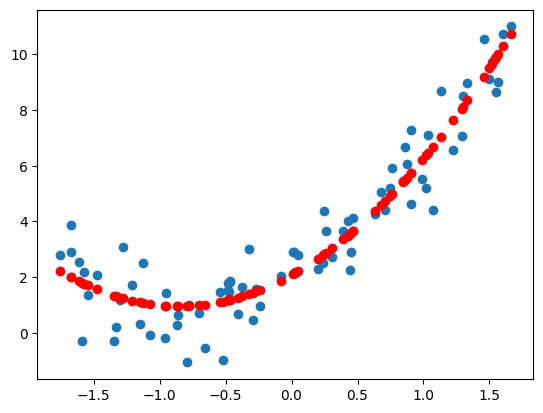

In [28]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="red")
plt.show()

degree 1 artırıp r2 score hangsinde fazlaysa onu kullanırız


In [31]:
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [33]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)#X_test_poly alındı
score=r2_score(y_test,y_pred)
print(score) # r2 score değerimiz azaldı yani büyük ihtimalle en iyi degree miz 2 idi

0.757344362140105


new data

In [39]:
new_df=pd.read_csv("3-newdatas.csv")

In [40]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [49]:
new_df.rename(columns={"Customer_Satisfaction":"Customer Satisfaction"},inplace=True)

In [50]:
new_df.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [52]:
X_new=new_df[["Customer Satisfaction"]]

In [53]:
X_new.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [54]:
X_new=scaler.transform(X_new)

In [55]:
X_new_poly=poly.transform(X_new) # degree şu an 3 larak devam ediyor

In [56]:
y_new=regression.predict(X_new_poly)

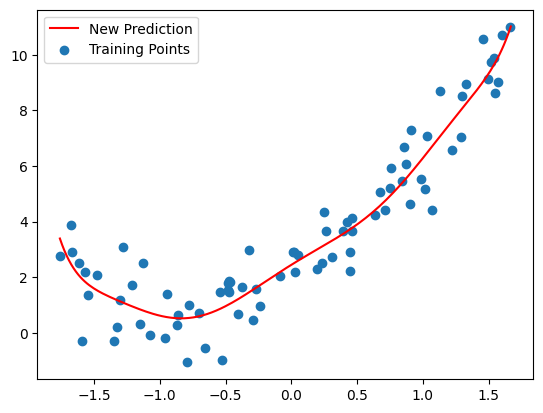

In [60]:
plt.plot(X_new,y_new,color="red",label="New Prediction")
plt.scatter(X_train,y_train, label="Training Points")
plt.legend()
plt.show()

**Pipline**==> yaşadığımız degree belirsizliği için daha kısa sürede ard arda farklı degreelele deneme yapmamıza olanak tanır

şu ana kadar yaptıklarımızı tek bir fonksiyonda yazıp tek seferde çağırma imkanı tanır

In [72]:
def poly_regression(degree):
  poly=PolynomialFeatures(degree=degree)
  scaler=StandardScaler()
  lin_reg=LinearRegression()
  pipeline=Pipeline([("poly",poly),("scaler",scaler),("lin_reg",lin_reg)])
  pipeline.fit(X_train,y_train)
  y_pred=pipeline.predict(X_test)
  score=r2_score(y_test,y_pred)
  print("r2 score:",score)

  y_new_pred=pipeline.predict(X_new)
  plt.plot(X_new,y_new_pred,color="red",label="New Prediction")
  plt.scatter(X_train,y_train, label="Training Points")
  plt.legend()
  plt.show()


r2 score: 0.2705652535622246


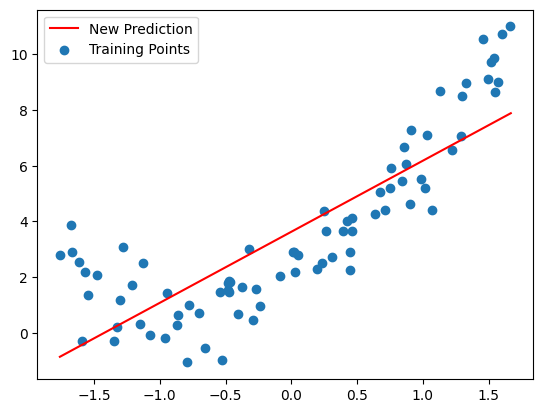

In [73]:
poly_regression(1)

r2 score: 0.7685687698788558


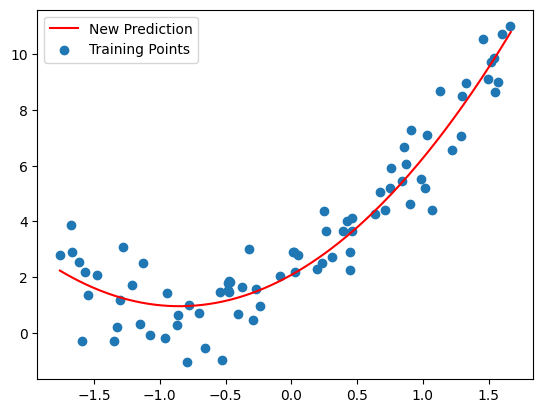

In [74]:
poly_regression(2)

r2 score: 0.2705652535622246


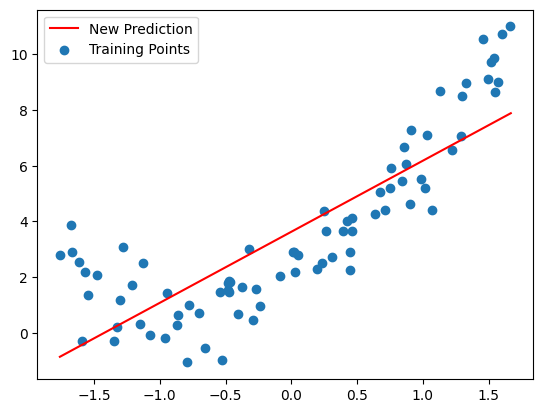

r2 score: 0.7685687698788558


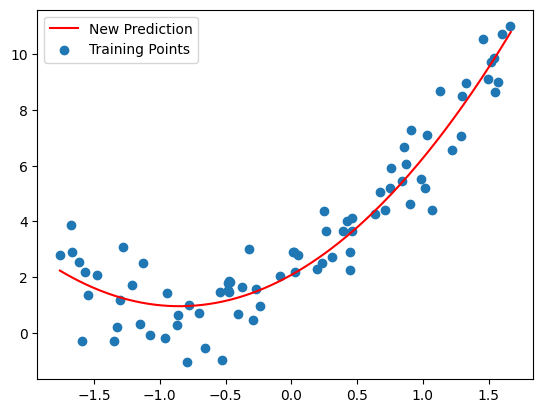

r2 score: 0.757344362140105


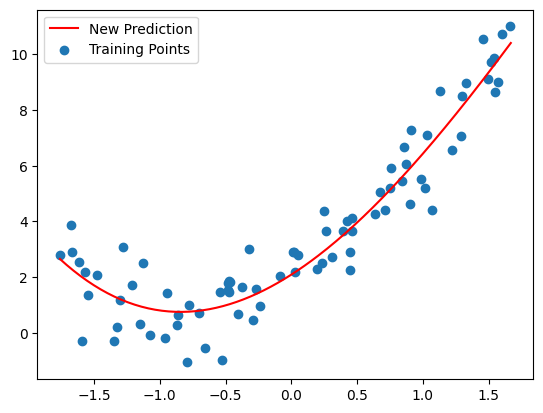

r2 score: 0.7355034443260429


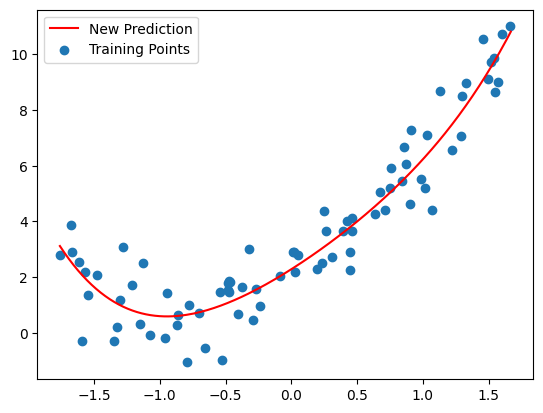

r2 score: 0.73512441650954


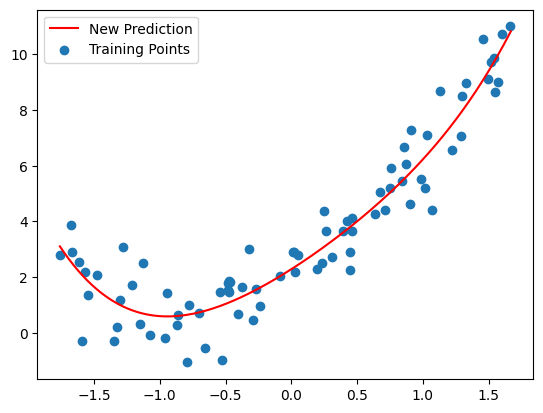

r2 score: 0.7343590482133429


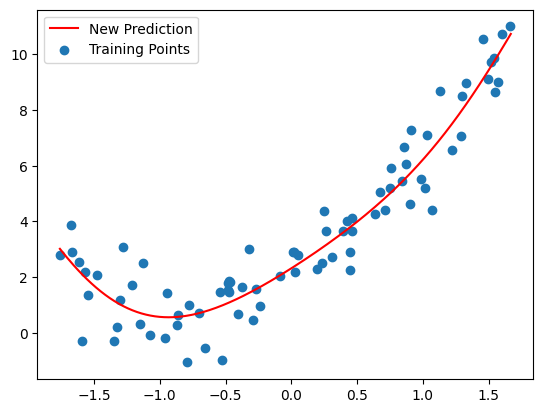

r2 score: 0.7347819263549451


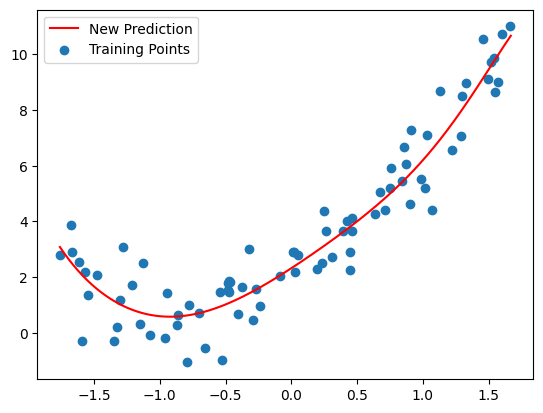

r2 score: 0.7411422099998392


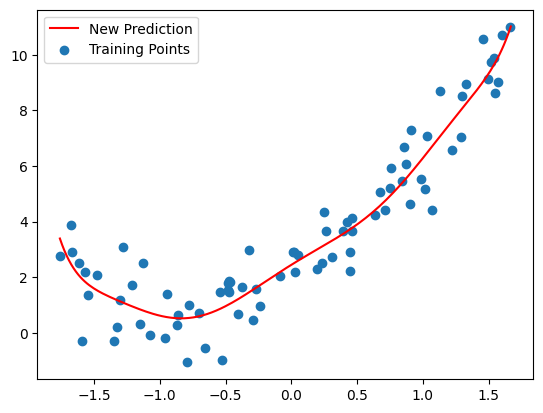

r2 score: 0.7310763879815945


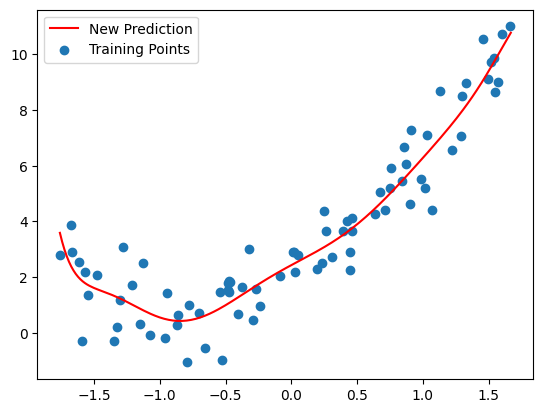

In [75]:
for degree in range(1,10):
  poly_regression(degree)